In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor 
from sklearn.preprocessing import MinMaxScaler, StandardScaler

**Ejercicios de Train-Test con ScikitLearn a partir de un dataset con información sobre las viviendas de Houston.**

# Ejercicio 1
Parta el conjunto de datos adjunto en train y test. Estudie los dos conjuntos por separado, a nivel descriptivo. También adjunto encontrará una descripción de las diferentes variables del dataset.

# Solución

In [3]:
df=pd.read_csv('housing data.csv', header=None,names=[ 'CRIM', 'ZN', 'INDUS',
                                                      'CHAS', 'NOX', 'RM', 'AGE',
                                                      'DIS', 'RAD', 'TAX', 'PTRATIO',
                                                      'B', 'LSTAT', 'MEDV'])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### 1. Procesado

1. Verificar si existe valores nulos.

In [153]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

2. Observar los tipos de datos de cada columna.

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


3. Mostrar descripción estadística de las variable.

In [4]:
df.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


4. Relación entre todas y cada una de las variables.

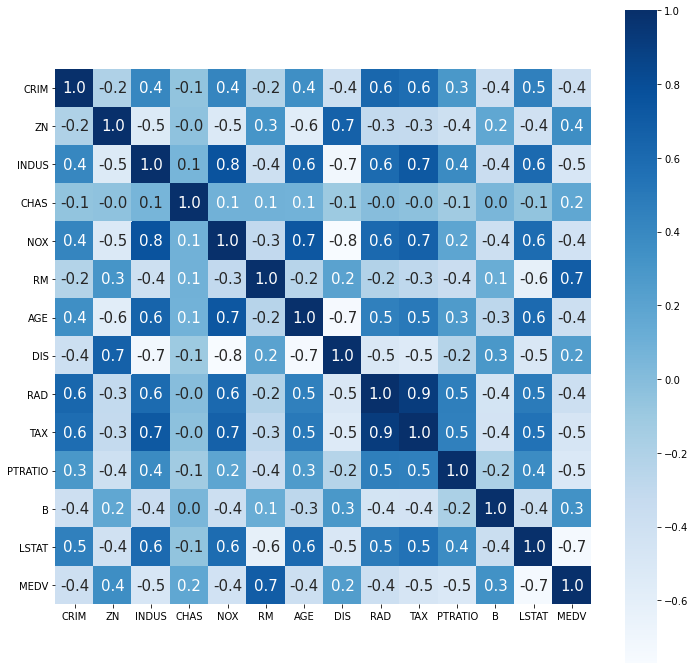

In [156]:
corr=df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, annot=True, cmap='Blues',annot_kws={'size':15},fmt='.1f',square=True);

Se observa una alta correlación del **MEDV** con **RM**(negativa) y **LSTAT**(positiva).

4. La variable objetivo será la columna, **MEDV**. Por lo tanto, la extraemos de la siguiente manera:

In [157]:
y=df['MEDV']
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

5. Eliminamos la columna **MEDV** de nuestro DataSet.

In [158]:
X=df.drop('MEDV', axis=1)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


### 2. División
Ahora, dividimos los datos aleatoriamente en conjuntos de **train**/**test** con divisiones de 0.7/0.3 respectivamente. Utilizamos el método **sklearn train_test_split()**. Este método puede tomar múltiples entradas y devolver múltiples salidas. Al pasar **X** e **y**, **X** se convierte en **XTrain** y **Xtest** , e **y** se convierte en **ytrain** y **ytest**. La variable **train_size** es la fracción de los datos originales que se incluirá en el conjunto de entrenamiento, y la **test_size** es la fracción que se incluirá en la otra división. Se pueden especificar por separado, por lo que se especifica **train** como 0.7, y **test** como 0.3.

In [159]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,train_size=0.8,test_size=0.2, random_state=123)

In [160]:
ytrain

203    48.5
441    17.1
172    23.1
95     28.4
54     18.9
       ... 
98     43.8
476    16.7
322    20.4
382    11.3
365    27.5
Name: MEDV, Length: 404, dtype: float64

In [161]:
ytest

410    15.0
85     26.6
280    45.4
422    20.8
199    34.9
       ... 
229    31.5
159    23.3
196    33.3
345    17.5
467    19.1
Name: MEDV, Length: 102, dtype: float64

### 3. Transformación
Hemos visto que nuestros datos tenían columnas con escalas muy diferentes, para hacer mejores predicciones tendremos que escalarlas. Para hacerlo, Scikit-learn proporciona opciones en el módulo de preprocesamiento para estandarizar (escalar calculando puntuaciones Z) y escalar mín-máx (para normalizar los datos para que estén en el rango [0, 1]), entre otras.

In [162]:
#Xtrain=StandardScaler().fit_transform(Xtrain)
#Xtest=StandardScaler().fit_transform(Xtest)

Xtrain=MinMaxScaler().fit_transform(Xtrain)
Xtest=MinMaxScaler().fit_transform(Xtest)

### 4. Modelado

#### Ejemplo de aprendizaje supervisado: Regresión lineal múltiple

Ahora es el momento de aplicar nuestro modelo a los datos, que para nuestro estudio será **LinearRegression**.

In [163]:
model=LinearRegression() ## instanciar el modelo
model.fit(Xtrain,ytrain) ## ajuste del modelo a los datos

#sgdr = SGDRegressor(max_iter = 1000) ## instanciar el modelo
#sgdr.fit(Xtrain,ytrain) ## ajuste del modelo a los datos

LinearRegression()

### 5. Predecir

In [164]:
#ypredict=sgdr.predict(Xtest) ## predecir con nuevos datos
ypredict=model.predict(Xtest) ## predecir con nuevos datos
ypredict

array([14.97292699, 27.22291312, 38.53394273, 17.74963033, 29.18449917,
       37.01004357, 24.50644195,  9.62005236, 13.92798654, 30.75730799,
       27.79872864, 18.45301078, 13.30356783, 30.89575281, 16.07121214,
       20.46274397, 19.98273999, 36.91290156, 17.53569143, 15.24587067,
       13.51814537, 23.6774705 , 32.51626405, 38.25653927, 30.74042785,
       21.71796176, 17.00321532, 19.97970405, 22.41289419, 20.01485298,
       25.47726712, 33.33971127, 14.21109728, 21.4165451 , 23.49713306,
       33.9974088 , 28.76434052, 17.7383543 , 13.47530173, 37.79489725,
       29.94972487, 17.7438294 , 19.21178145, 39.58684595,  7.43629841,
       26.1393906 , 18.72044628, 25.1071748 , 14.96464573, 25.37402015,
       33.82850659, 23.7516799 , 19.03356668, 12.00111322, 23.90123503,
       17.44705673,  9.17474778,  1.6507786 , 30.45866604, 13.13395445,
       19.82286705, 22.28837971, 19.09660936, 17.26227148, 24.1804201 ,
       26.04562839, 25.21704729, 21.58944952, 24.0120706 , 29.32

In [165]:
df_compare = pd.DataFrame({"ytest":ytest,"predict":ypredict.round(2)})
df_compare.reset_index(drop=True,inplace=True)
df_compare


,ytest,predict
0,15.0,14.97
1,26.6,27.22
2,45.4,38.53
3,20.8,17.75
4,34.9,29.18
...,...,...
97,31.5,30.70
98,23.3,26.11
99,33.3,35.15
100,17.5,15.53


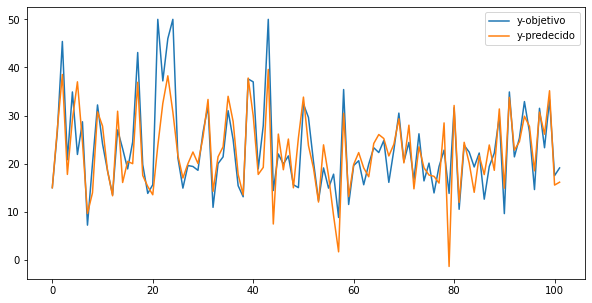

In [167]:
plt.subplots(figsize=(10,5))
x_points =list(range(len(ytest)))
plt.plot(x_points,ytest,label='y-objetivo')
plt.plot(x_points,ypredict,label='y-predecido')
plt.legend()
plt.show()

# Ejercicio 2
Aplique algún proceso de transformación (estandarizar los datos numéricos, crear columnas dummies, polinomios...).

# Solución

### Normalización

El concepto de normalización trata del proceso de ajustar los valores medidos en diferentes escalas a escalas comunes antes de realizar estadísticas descriptivas, y se denota mediante la siguiente ecuación: 

$$
x_{nor}=\frac{x-x_{min}}{x_{max}-x_{min}}
$$

### Normalización estándar

La normalización estándar es similar a la normalización excepto que tiene una media de 0 y una desviación estándar de 1. La normalización estándar se denota mediante la siguiente ecuación: 

$$
x_{st}=\frac{x-\mu}{\sigma}
$$

Por Ejemplo, para  crear dos nuevas columna una normalizada y otra estandarizada de la columna **TAX**, podemos utilizar el siguiente código: 

```python
df['TAX_NOR']=(df.TAX-df.TAX.min())/(df.TAX.max()-df.TAX.min())
df.head()
```

```python
df['TAX_SN']=(df.TAX-df.TAX.mean())/(df.TAX.std())
df.head()
```

Sin embargo, haremos uso de la libreria **sklearm** de python para obtener estas nuevas columnas de la siguiente manera:

#### Crear columna normalizada

In [168]:
normalize=MinMaxScaler()
df['AGE_NOR']=normalize.fit_transform(df[['AGE']])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,AGE_NOR
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,0.641607
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,0.782698
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,0.599382
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,0.441813
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,0.528321


#### Crear columna estandarizada

In [169]:
standard = StandardScaler()
df['RM_ST']=standard.fit_transform(df[['RM']])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,AGE_NOR,RM_ST
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,0.641607,0.413672
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,0.782698,0.194274
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,0.599382,1.282714
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,0.441813,1.016303
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,0.528321,1.228577


## Ejercicio 3
Resuma las nuevas columnas generadas de manera estadística y gráfica

# Solución

1. Los datos de la columna **AGE_NORM**, oscilan entre 0 y 1, esto es fácil de ver en la fórmula del **Ejercicio 2** , dado que, si $x=x_{min}$ , entonces $x_{nor}=0$. Por otro lado, si $x=x_{max}$ , entonces $x_{nor}=1$.

In [170]:
df.AGE_NOR.describe()

count    506.000000
mean       0.676364
std        0.289896
min        0.000000
25%        0.433831
50%        0.768280
75%        0.938980
max        1.000000
Name: AGE_NOR, dtype: float64

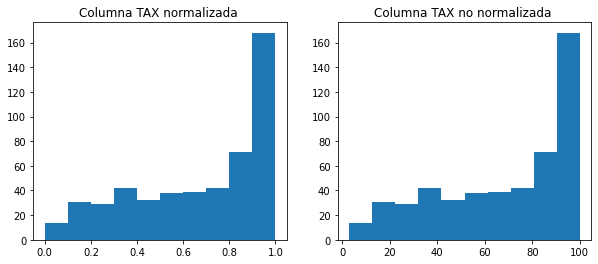

In [171]:
fig=plt.figure(figsize=(10,4))
ax1=fig.add_subplot(1,2,1)
ax1.hist(df['AGE_NOR'])
plt.title('Columna TAX normalizada ')

ax2=fig.add_subplot(1,2,2)
ax2.hist(df['AGE'])
plt.title('Columna TAX no normalizada ');

2. Los datos de la columna **RM_ST**, tiene como $\mu = 0$ y $\sigma = 1$. La estandarización supone que las observaciones se ajustan a una distribución gaussiana (curva de campana) con una media y una desviación estándar de buen comportamiento.

In [172]:
df.RM_ST.describe().round(4)

count    506.0000
mean      -0.0000
std        1.0010
min       -3.8802
25%       -0.5686
50%       -0.1085
75%        0.4828
max        3.5550
Name: RM_ST, dtype: float64

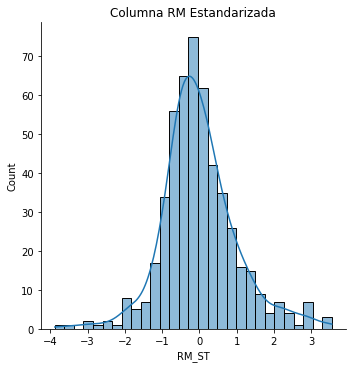

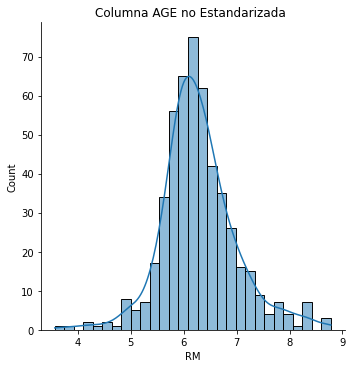

In [173]:
sns.displot(df['RM_ST'],kde=True)
plt.title('Columna RM Estandarizada')

sns.displot(df['RM'],kde=True)
plt.title('Columna AGE no Estandarizada ');

